In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('imdb_top_1000_cleaned.csv')

In [3]:
# columns
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Genre', 'IMDB_Rating',
       'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross', 'Duration(min)', 'Drama', 'Crime',
       'Action', 'Adventure', 'Biography', 'History', 'Sci-Fi', 'Romance',
       'Western', 'Fantasy', 'Comedy', 'Thriller', 'Animation', 'Family',
       'War', 'Mystery', 'Music', 'Horror', 'Musical', 'Film-Noir', 'Sport',
       'Other'],
      dtype='object')

<AxesSubplot:>

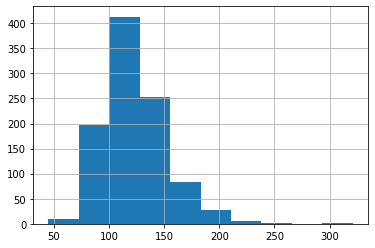

In [4]:
df['Duration(min)'].hist()

In [5]:
px.histogram(df['Duration(min)'], color = df['Sci-Fi'])

In [6]:
fig = px.histogram(df['Released_Year'])
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total ascending'})

In [7]:
df1 = pd.read_csv('imdb_top_1000.csv')

In [8]:
df_copy = df.copy()
df_genre = pd.concat([df_copy, df['Genre'].str.split(',', expand = True)], axis = 1)
df_new = df_genre.melt(id_vars = ['Series_Title', 'Released_Year', 'Certificate', 'Genre', 'IMDB_Rating',
       'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross', 'Duration(min)'], value_vars = range(3))
df_new = df_new[df_new['value'].notna()]
df_new = df_new.drop(columns = ['Genre', 'variable'])
df_new = df_new.rename({'value': 'Genre'}, axis = 1)
df_new['Genre'] = df_new['Genre'].apply(lambda x: x.replace(' ', ''))
df_new

,Series_Title,Released_Year,Certificate,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Duration(min),Genre
0,The Shawshank Redemption,1994,A,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,142,Drama
1,The Godfather,1972,A,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,175,Crime
2,The Dark Knight,2008,UA,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,152,Action
3,The Godfather: Part II,1974,A,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,202,Crime
4,12 Angry Men,1957,U,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,96,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,Blowup,1966,A,7.6,A fashion photographer unknowingly captures a ...,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,0,111,Thriller
2964,A Hard Day's Night,1964,U,7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024,87,Musical
2965,Breakfast at Tiffany's,1961,A,7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,0,115,Romance
2967,From Here to Eternity,1953,Passed,7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000,118,War


In [9]:
fig = px.histogram(df_new['Genre'])
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig

In [10]:
df_new_copy = df_new.copy()
df_new_copy = df_new_copy.melt(id_vars = ['Series_Title', 'Released_Year', 'Certificate', 'Genre', 'IMDB_Rating',
       'Overview', 'Meta_score', 'Director', 'No_of_Votes', 'Gross', 'Duration(min)'], value_vars = [f'Star{i}' for i in range(1, 5)])
df_new_copy = df_new_copy.drop(columns= ['variable'])
data = df_new_copy.rename({'value':'Star'}, axis = 1)
data


,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,No_of_Votes,Gross,Duration(min),Star
0,The Shawshank Redemption,1994,A,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,2343110,28341469,142,Tim Robbins
1,The Godfather,1972,A,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,1620367,134966411,175,Marlon Brando
2,The Dark Knight,2008,UA,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,2303232,534858444,152,Christian Bale
3,The Godfather: Part II,1974,A,Crime,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,1129952,57300000,202,Al Pacino
4,12 Angry Men,1957,U,Crime,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,689845,4360000,96,Henry Fonda
...,...,...,...,...,...,...,...,...,...,...,...,...
10055,Blowup,1966,A,Thriller,7.6,A fashion photographer unknowingly captures a ...,82.0,Michelangelo Antonioni,56513,0,111,John Castle
10056,A Hard Day's Night,1964,U,Musical,7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,40351,13780024,87,Ringo Starr
10057,Breakfast at Tiffany's,1961,A,Romance,7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,166544,0,115,Buddy Ebsen
10058,From Here to Eternity,1953,Passed,War,7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,43374,30500000,118,Donna Reed


In [11]:
data[data['Star']=='Leonardo DiCaprio']['IMDB_Rating'].mean()
avg_imdb = pd.DataFrame({'Stars':data['Star'].unique(),  'AVERAGE_RATING': [data[data['Star']==i]['IMDB_Rating'].mean() for i in data['Star'].unique()]})
avg_imdb

,Stars,AVERAGE_RATING
0,Tim Robbins,7.911111
1,Marlon Brando,8.433333
2,Christian Bale,8.040000
3,Al Pacino,8.027273
4,Henry Fonda,8.350000
...,...,...
2678,Ringo Starr,7.600000
2679,Buddy Ebsen,7.600000
2680,Carroll Baker,7.600000
2681,William Bendix,7.600000


In [50]:
d = data.iloc[0:100, :]
fig = px.bar(d, x = 'Genre', y = 'IMDB_Rating', color = 'Star',  barmode="group")

In [51]:
fig

In [69]:
data_old = data[data['Released_Year'] <= 2004]
data_mid = data[(data['Released_Year'] <= 2015) & (data['Released_Year'] > 2004)]
data_new = data[data['Released_Year'] >= 2015]

In [61]:
data['Released_Year'] = data['Released_Year'].apply(lambda x: x.replace('PG', '1995'))

In [62]:
data['Released_Year'] = data['Released_Year'].astype(int)

In [74]:
px.histogram(data['IMDB_Rating'])


In [71]:
px.histogram(data_old['IMDB_Rating'])

In [72]:
px.histogram(data_mid['IMDB_Rating'])

In [73]:
px.histogram(data_new['IMDB_Rating'])